In [1]:
import os
import numpy as np
import cv2
import pickle
from PIL import Image
from keras_facenet import FaceNet
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
from keras_facenet import FaceNet

# Load FaceNet model + built-in MTCNN detector
embedder = FaceNet()
print("✅ FaceNet model loaded and ready.")

✅ FaceNet model loaded and ready.


In [3]:
import os
import numpy as np
from PIL import Image

TRAIN_DIR = 'C:\\new_drive\\Computer Vision\\CV_Project\\CV_DATASET'

def load_faces_from_drive(train_dir):
    face_list = []
    label_list = []

    for person_name in os.listdir(train_dir):
        person_path = os.path.join(train_dir, person_name)
        if not os.path.isdir(person_path):
            continue

        for filename in os.listdir(person_path):
            img_path = os.path.join(person_path, filename)
            try:
                image = Image.open(img_path).convert('RGB')
                image_np = np.asarray(image)
                results = embedder.extract(image_np, threshold=0.95)
                if results:
                    face_list.append(results[0]['embedding'])
                    label_list.append(person_name)
            except:
                print(f"⚠️ Skipping unreadable image: {img_path}")

        print(f"✅ Processed {person_name} ({len(os.listdir(person_path))} images)")

    return np.array(face_list), np.array(label_list)

In [4]:
X, y = load_faces_from_drive(TRAIN_DIR)
print(f"✅ Loaded {len(X)} face embeddings for {len(set(y))} people.")

1/1 [==============================] - 0s 79ms/step
✅ Processed ABDELRAHMAN_KHALED (5 images)
1/1 [==============================] - 0s 63ms/step
✅ Processed ADEL_AHMED (5 images)
1/1 [==============================] - 0s 69ms/step
✅ Processed AHMED_ABDELAZIZ (5 images)
1/1 [==============================] - 0s 58ms/step
✅ Processed FARIDA_ABDELBAKY (5 images)
1/1 [==============================] - 0s 100ms/step
✅ Processed MALAK_HOSSAM (5 images)
1/1 [==============================] - 0s 54ms/step
✅ Processed MALAK_MOHAMED (5 images)
1/1 [==============================] - 0s 66ms/step
✅ Processed MAYAR_HOSSAM (6 images)
1/1 [==============================] - 0s 68ms/step
✅ Processed MENNA_MOHEI (5 images)
1/1 [==============================] - 0s 68ms/step
✅ Processed MOHAMED_HAYTHAM (5 images)
1/1 [==============================] - 0s 74ms/step
✅ Processed NOUR_TAMER (5 images)
1/1 [==============================] - 0s 54ms/step
✅ Processed OMAR_ALAA (6 images)
1/1 [=================

In [6]:
from numpy.linalg import norm

idx1 = np.where(y == y[0])[0][0]  # First occurrence of person 1
idx2 = np.where(y == y[0])[0][1]  # Second image of same person
idx3 = np.where(y != y[0])[0][0]  # A different person

same_person_distance = norm(X[idx1] - X[idx2])
diff_person_distance = norm(X[idx1] - X[idx3])

print(f"✅ Distance (same person): {same_person_distance:.3f}")
print(f"❌ Distance (different people): {diff_person_distance:.3f}")

✅ Distance (same person): 0.632
❌ Distance (different people): 1.266


In [7]:
import matplotlib.pyplot as plt
import cv2

def show_face_detections(image_path):
    image = Image.open(image_path).convert('RGB')
    image_np = np.asarray(image).copy()
    results = embedder.extract(image_np, threshold=0.95)

    if not results:
        print("❌ No faces detected.")
        return

    print(f"✅ Detected {len(results)} face(s)")

    for face in results:
        x, y, w, h = face['box']
        x, y = abs(x), abs(y)
        cv2.rectangle(image_np, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(image_np)
    plt.axis('off')
    plt.title("Face Detection with Bounding Boxes")
    plt.show()


1/1 [==============================] - 0s 58ms/step
✅ Detected 1 face(s)


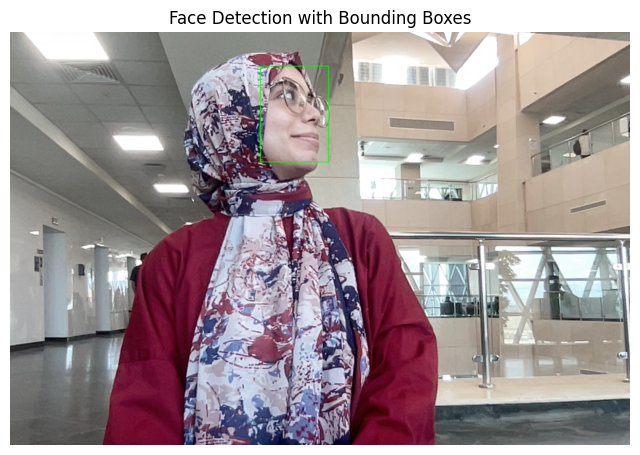

In [ ]:
show_face_detections('CV_DATASET/MENNA_MOHEI/Photo on 15-05-2025 at 1.01 PM #3.jpg')

C:\Users\Shaden\AppData\Local\Temp\ipykernel_24444\3482280736.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


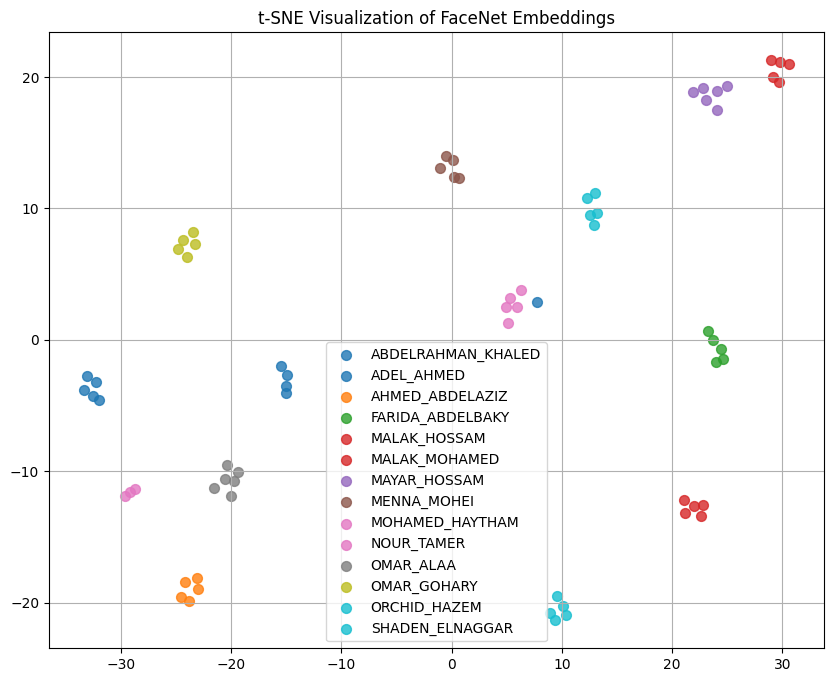

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
X_2D = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
unique_labels = np.unique(y)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    indices = np.where(y == label)
    plt.scatter(X_2D[indices, 0], X_2D[indices, 1], label=label, alpha=0.8, s=50, color=colors(i))

plt.title('t-SNE Visualization of FaceNet Embeddings')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
in_encoder = Normalizer(norm='l2')
X_norm = in_encoder.fit_transform(X)

out_encoder = LabelEncoder()
y_enc = out_encoder.fit_transform(y)



In [ ]:
np.savez_compressed('C:\\new_drive\\Computer Vision\\CV_Project\\embeddings_dataset.npz', X_norm, y_enc)

In [12]:
with open('C:\\new_drive\\Computer Vision\\CV_Project\\label_encoder.pkl', 'wb') as f:
    pickle.dump(out_encoder, f)

print("✅ Embeddings and labels saved. Ready for cosine similarity matching.")

✅ Embeddings and labels saved. Ready for cosine similarity matching.
